Mounted at /content/drive
Sample Data:
                                                  url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_doma

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8331 - loss: 0.3625 - val_accuracy: 0.9436 - val_loss: 0.1650
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9480 - loss: 0.1436 - val_accuracy: 0.9444 - val_loss: 0.1546
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9560 - loss: 0.1279 - val_accuracy: 0.9466 - val_loss: 0.1424
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9584 - loss: 0.1189 - val_accuracy: 0.9514 - val_loss: 0.1377
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1147 - val_accuracy: 0.9506 - val_loss: 0.1400
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1037 - val_accuracy: 0.9532 - val_loss: 0.1294
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9658 - loss: 0.0941 - val_accuracy: 0.9571 - val_loss: 0.1286
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9667 - loss: 0.0901 - val_accuracy: 0

✅ Model saved to /content/drive/MyDrive/cnn.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1077

Test Accuracy: 0.9598


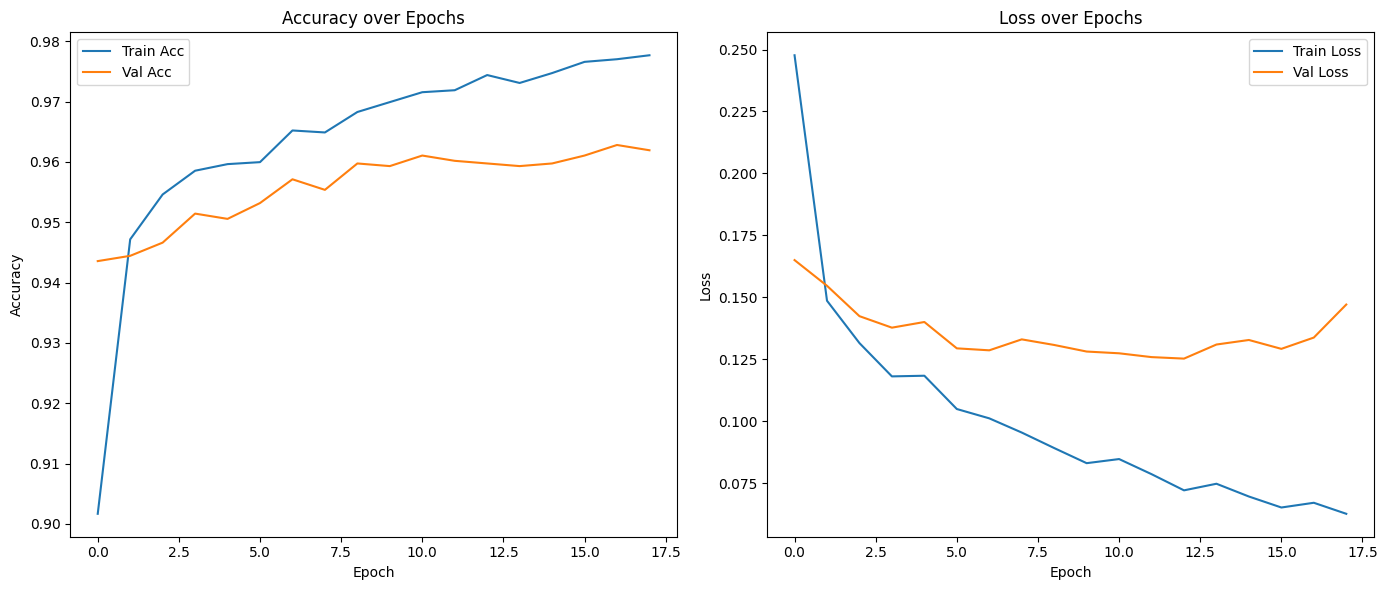

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.96      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



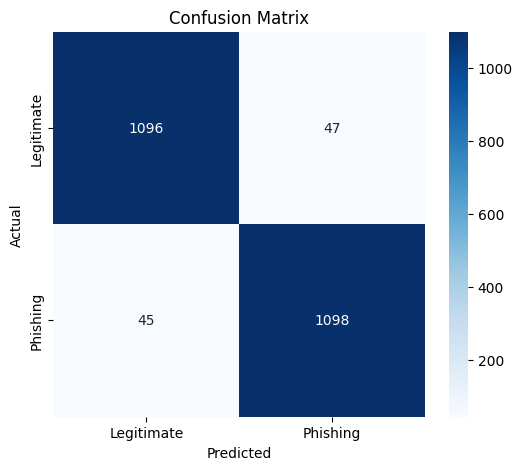

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/models/dataset_phishing.csv')

# Preview
print("Sample Data:\n", df.head())
print("\nData Shape:", df.shape)

# Encode target column
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})

# Drop non-numeric/text column (like URL)
df.drop(columns=['url'], inplace=True)

# Features and labels
X = df.drop('status', axis=1)
y = df['status']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Save the model
model.save('/content/drive/MyDrive/dnn2.h5')
print("✅ Model saved to /content/drive/MyDrive/cnn.h5")

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Plot accuracy & loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions and classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
